# Exercise 1 a.

Loading the data from the arff file and converting it into a dataframe

In [42]:
from scipy.io.arff import loadarff
import pandas as pd

# Load the data
data = loadarff('./column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Separating the input data and the output data, required for some sklean functions

In [43]:
x = df.drop('class', axis=1)
y = df['class']

First, we will apply a 10-fold stratified cross-validation with shuffling for the 
assessment of predictive models along this section.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats

# Create 10-fold stratified cross-validation with shuffling
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


We will be comparing the performance of KNN with K =5 and naïve Bayes with Gaussian assumption. 

In [45]:
# Create classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

Then, we will perform cross-validation for both the models.

In [46]:
# Perform cross-validation and get accuracies for k-NN and Naive Bayes
knn_scores = cross_val_score(knn_classifier, x, y, cv=cv)
print("knn_scores:", knn_scores)
nb_scores = cross_val_score(nb_classifier, x, y, cv=cv)
print("nb_scores", nb_scores)

knn_scores: [0.93548387 0.80645161 0.87096774 0.93548387 0.74193548 0.87096774
 0.83870968 0.83870968 0.77419355 0.77419355]
nb_scores [0.83870968 0.87096774 0.83870968 0.87096774 0.77419355 0.83870968
 0.90322581 0.80645161 0.77419355 0.70967742]


Having the scores for both the models, we will compare them using two boxplots with the fold accuracies for each classifier.

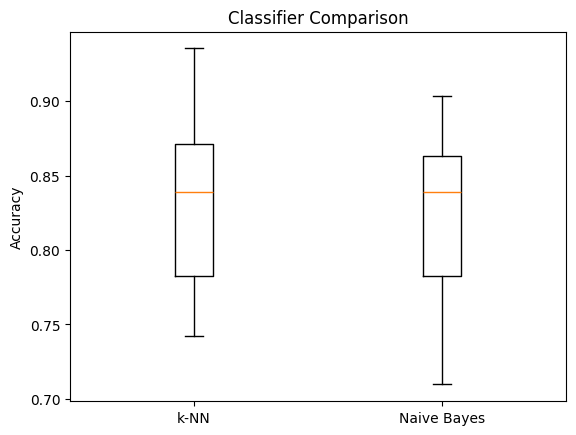

In [47]:
# Plot boxplots for fold accuracies
plt.boxplot([knn_scores, nb_scores], labels=['k-NN', 'Naive Bayes'])
plt.title('Classifier Comparison')
plt.ylabel('Accuracy')
plt.show()

# Exercise 1 b.

To compare the two classifiers, we will perform a statistical test.

In [48]:
# Perform a statistical test to compare the two classifiers
_, p_value = stats.ttest_rel(knn_scores, nb_scores)

# Define a significance level (default value of 0.05)
alpha = 0.05

# Check if k-NN is statistically superior to Naive Bayes
if p_value < alpha:
    print("Reject null hypothesis: k-NN is statistically superior to Naive Bayes regarding accuracy")
else:
    print("Fail to reject null hypothesis: No statistical difference between k-NN and Naive Bayes")

Fail to reject null hypothesis: No statistical difference between k-NN and Naive Bayes
